## Tytuł: Dermatology
Projekt dotyczy analizy bazy danych dermatologicznych, której celem jest wsparcie procesu diagnostynego różnicowania chorób erytemato-squamous. Baza danych została udostępniona przez dr. Nilsel Ilter z Uniwersytetu Gazi oraz dr. H. Altay Guvenir z Uniwersytetu Bilkent w Turcji. Dane zostały zebrane w celu opracowania narzędzi wspomagających diagnozę chorób skóry, które charakteryzują się podobnymi objawami klinicznymi i histopatologicznymi, co stanowi istotne wyzwanie w dermatologii.

## Kontekst Medyczny
Choroby erytemato-squamous, takie jak łuszczyca, łojotokowe zapalenie skóry, liszaj płaski, pityriasis rosea, przewlekłe zapalenie skóry oraz pityriasis rubra pilaris, wykazują podobne cechy kliniczne, takie jak rumień i złuszczanie się naskórka. Różnicowanie tych chorób jest trudne, ponieważ często wymaga biopsji, a nawet wówczas cechy histopatologiczne mogą być mylące. Dodatkowo, w początkowych stadiach choroby mogą przypominać inne schorzenia, co utrudnia postawienie trafnej diagnozy.

## Charakterystyka Danych
Baza danych składa się z 366 przypadków pacjentów, opisanych za pomocą 34 atrybutów. Wśród nich:
- 12 atrybutów klinicznych: opisujących objawy widoczne podczas badania fizykalnego, takie jak rumień, złuszczanie, swędzenie, czy obecność zmian na błonach śluzowych.
- 22 atrybuty histopatologiczne: uzyskane na podstawie analizy próbek skóry pod mikroskopem, np. obecność melaniny w skórze, nacieki eozynofilowe czy zmiany w warstwie brodawkowej skóry.
- Atrybut wieku: reprezentujący wiek pacjenta.
- Historia rodzinna: wskazująca, czy u członków rodziny pacjenta występowały podobne choroby.

Wartości większości atrybutów są skategoryzowane w skali od 0 do 3, gdzie:
- 0: brak cechy,
- 1, 2, 3: stopniowe nasilenie cechy.

W bazie danych występują również brakujące wartości w kolumnie dotyczącej wieku, oznaczone symbolem ?.

## Cel Projektu
Głównym celem projektu jest analiza danych oraz zbudowanie modeli uczenia maszynowego, które umożliwią klasyfikację typu choroby erytemato-squamous na podstawie dostępnych cech klinicznych i histopatologicznych. Wykorzystane zostaną techniki eksploracji danych, wizualizacji oraz algorytmy uczenia nadzorowanego, takie jak regresja logistyczna i lasy losowe, aby ocenić ich skuteczność w różnicowaniu chorób.

## Znaczenie Projektu
Projekt ma na celu wsparcie dermatologów w procesie diagnostycznym, redukując konieczność przeprowadzania inwazyjnych badań, takich jak biopsja, oraz skracając czas postawienia diagnozy. Poprawa dokładności diagnozy może przyczynić się do szybszego wdrożenia odpowiedniego leczenia, co ma istotne znaczenie dla jakości życia pacjentów.

Ładowanie danych

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Ponieważ w pliku z danymi nie ma nazw kolumn musimy je dodać ręcznie, poniższe nazwy są skopiowane z pliku dermatology.names

In [3]:
column_names = [
    # poniższe kolumny przyjmyją wartości 0, 1, 2, 3 chyba że wskazano inaczej
    "erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon",
    "polygonal_papules", "follicular_papules", "oral_mucosal_involvement",
    "knee_and_elbow_involvement", "scalp_involvement", "family_history",
    # poniższe kolumny przyjmyją wartości 0, 1, 2, 3                
    "melanin_incontinence",
    "eosinophils_in_the_infiltrate", "PNL_infiltrate", "fibrosis_of_the_papillary_dermis",
    "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing_of_the_rete_ridges",
    "elongation_of_the_rete_ridges", "thinning_of_the_suprapapillary_epidermis",
    "spongiform_pustule", "munro_microabcess", "focal_hypergranulosis", "disappearance_of_the_granular_layer",
    "vacuolisation_and_damage_of_basal_layer", "spongiosis", "saw-tooth_appearance_of_retes",
    "follicular_horn_plug", "perifollicular_parakeratosis", "inflammatory_monoluclear_inflitrate",
    "band_like_infiltrate", 

    "age", 
    # target
    "class"] 

Ładujemy dane

In [5]:
data = pd.read_csv("dermatology.data", names=column_names)

In [7]:
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


Sprawdzenie czy są brakujące dane

In [9]:
print(data.isnull().sum())

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [11]:
for col in data.columns:
    count = (data[col] == '?').sum()
    data[col] = data[col].replace('?', 0)
        
    if count > 0:
        print(f"{col}: {count}")

age: 8


Otóż mamy 8 rekordów w których brakuje wartości age, ponieważ nie mamy sporej ilości danych lepiej jest zamiast usunięcia tych wierszy zastąpić "?" medianą

In [13]:
data['age'] = data['age'].astype('int')
data.fillna(data["age"].median(), inplace=True)

Musimy przekształcić resztę kolumn na typ kategoryczny dla poprawnej interpretacji danych przez modele. Liczby 0, 1, 2, 3 nie oznaczają wartości liczbowych, lecz poziomy cechy. Te wartości nie mają charakteru ciągłego (np. 1 nie oznacza, że cecha jest dokładnie dwa razy słabsza niż 2). Jest to skala porządkowa (ordinal), więc lepiej traktować je jako kategorie. Będzie to korzystne w przypadku regresji logistycznej

In [21]:
for column in column_names:
    if column == 'age':
        continue
    data[column] = data[column].astype('category')

data.info()

Sprawdzenie rozkładu danych w kategorii class która jest naszym targetem

In [147]:
class_distribution = data["class"].value_counts()
print(class_distribution)

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


Jak widać pod tym względem dataset nie jest zbilansowany, klasa 1 znacznie przeważa inne klasy. Dlatego w podalszej analizie i ocenianiu wyników musimy brać pod uwagę nie tylko ogólną precyzję modeli, lecz także jak dobrze radzą sobie z każdą poszczególną klasą

Czas na zbudowanie modeli

In [153]:
X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standaryzacja

In [156]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model 1: Logistic Regression

In [159]:
log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



Model 2: Random Forest

In [162]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



Wyniki wydają się podejźliwie dobre. Spróbujmy wyjaśnić dlaczego tak jest

Dla początku sprawdźmy jakie cechy zostały uznane jako ważne przez random forest

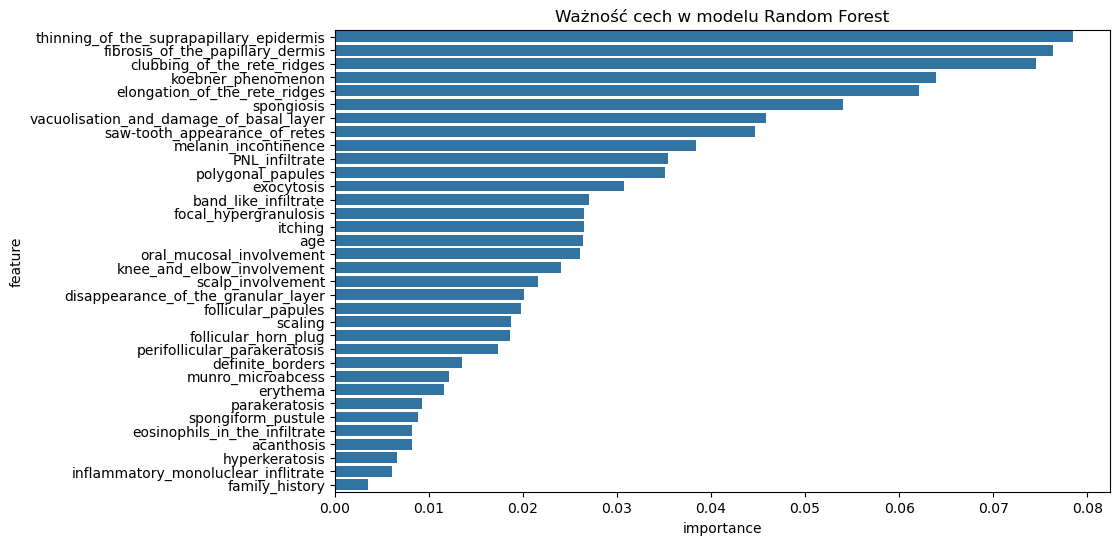

In [48]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Ważność cech w modelu Random Forest')
plt.show()

Jak można zobaczyć powyżej, najważniejszymi cechami są: 
- thinning_of_the_suprapapillary_epidermis
- fibrosis_of_the_papillary_dermis
- clubbing_of_the_rete_ridges
- koebner_phenomenon
- elongation_of_the_rete_ridges
- spongiosis

Podejźliwie wysokie wartości dokładności mogą świadczyć o możliwym problemie z nadmiernym dopasowaniem (overfitting). Random Forest jest odporny na overfitting, ale Regresja Logistyczna? Skoro obie metody osiągnęły niemal identyczne wyniki, oznacza to, że problem może leżeć gdzie indziej. Oczywiście, wysoka dokładność może też świadczyć o tym, że dane w datasecie są łatwo separowalne po kategoriach. Sprawdźmy to

Poniższy wykres przedstawia pairplot, czyli macierz wykresów przedstawiających zależności między zmiennymi w podzbiorze danych. Na przekątnej znajdują się rozkłady gęstości (KDE) dla każdej zmiennej, a poza przekątną widzimy wykresy punktowe ukazujące relacje między parami cech. Punkty są kolorowane zgodnie z kolumną "class", co pozwala zobaczyć, jak różne klasy rozkładają się w przestrzeni cech. Wykres został wykonany dla 5 najważniejszych cech wg random forest

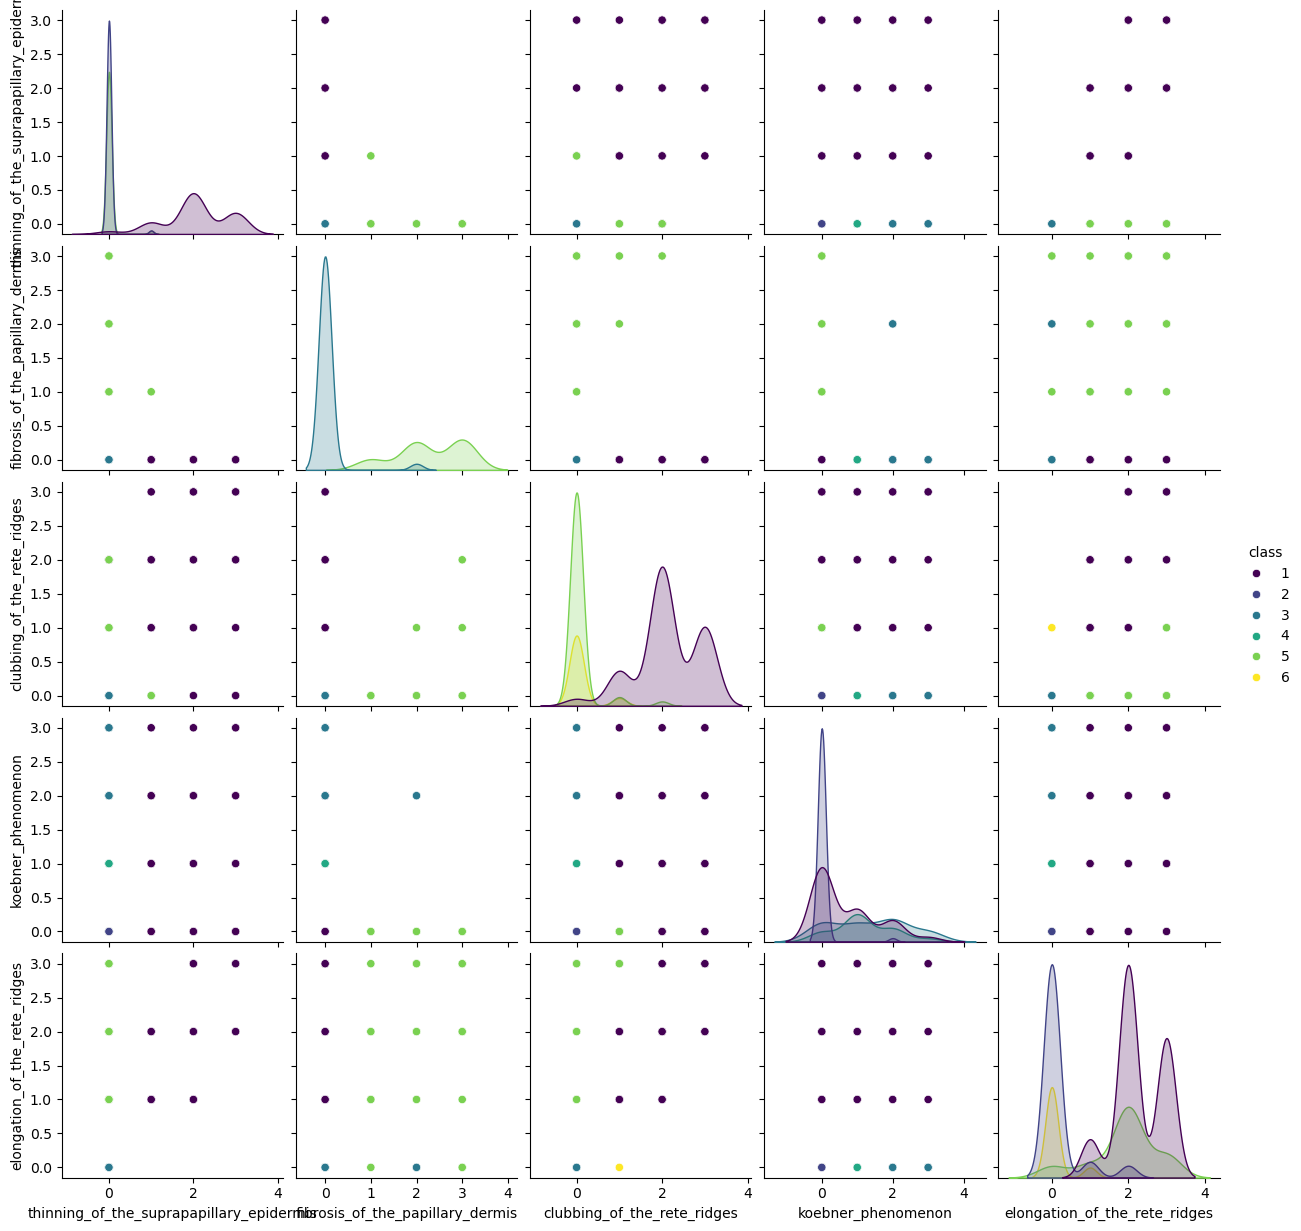

In [173]:
subset = data[["thinning_of_the_suprapapillary_epidermis", "fibrosis_of_the_papillary_dermis", 
               "clubbing_of_the_rete_ridges", "koebner_phenomenon", 
               "elongation_of_the_rete_ridges","class"]]

for col in subset:
    subset[col] = pd.to_numeric(subset[col], errors="coerce")
 
sns.pairplot(subset, hue="class", palette="viridis")
plt.show()

Widoczna separacja w KDE dla niektórych cech
- niektóre klasy są wyraźnie oddzielone w rozkładach gęstości, np. "clubbing_of_the_rete_ridges" oraz "elongation_of_the_rete_ridges" mają charakterystyczne piki dla różnych klas
- w kilku miejscach widać odseparowane grupy punktów, co sugeruje, że kombinacja tych cech może poprawić klasyfikację (np. poprzez model wielowymiarowy)
- brak wyraźnych klastrów sugeruje, że separacja w przestrzeni 2D może być trudna.

Wydaje się, że najlepszym sposobem na podalszą analizę jest wykonanie mapy korelacji

Zmiana nazw kolumn na krótsze dla lepszej czytelności wykresu

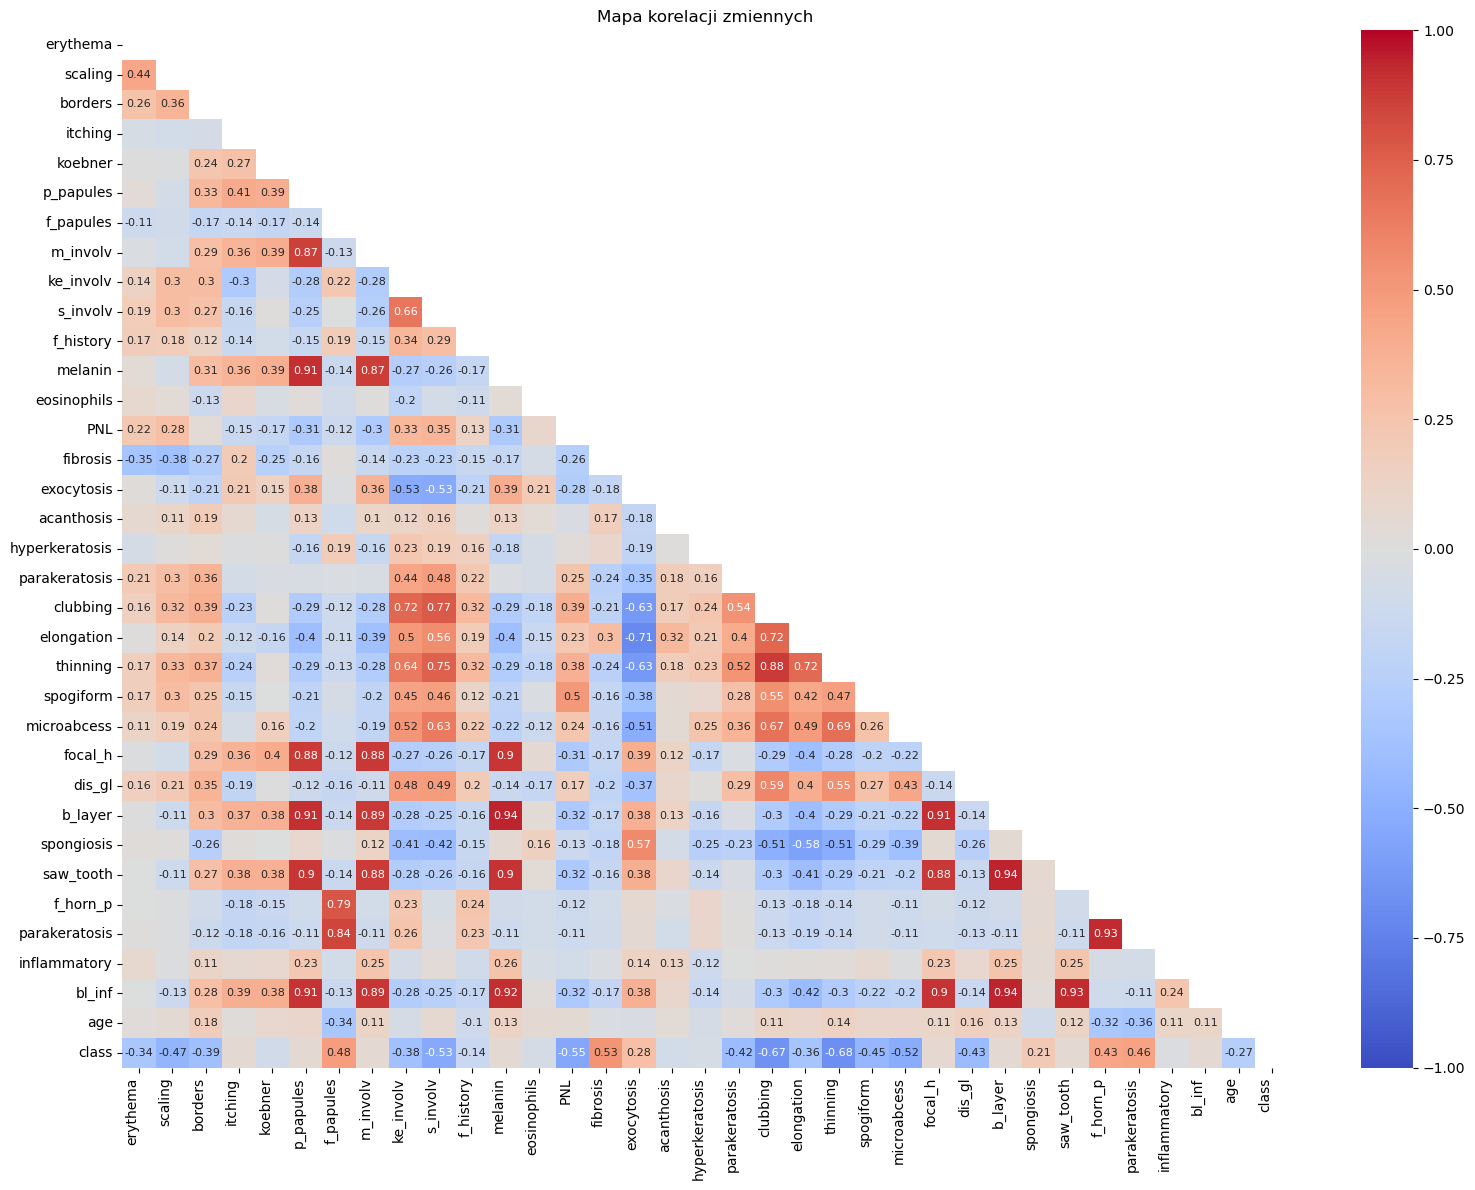

In [94]:
short_names = {
    "thinning_of_the_suprapapillary_epidermis": "thinning",
    "fibrosis_of_the_papillary_dermis": "fibrosis",
    "clubbing_of_the_rete_ridges": "clubbing",
    "koebner_phenomenon": "koebner",
    "elongation_of_the_rete_ridges": "elongation",
    "inflammatory_monoluclear_inflitrate": "inflammatory",
    "definite_borders": "borders",
    "polygonal_papules": "p_papules",
    "follicular_papules": "f_papules",  
    "oral_mucosal_involvement": "m_involv", 
    "knee_and_elbow_involvement": "ke_involv",
    "scalp_involvement": "s_involv",
    "family_history": "f_history",
    "melanin_incontinence": "melanin",
    "eosinophils_in_the_infiltrate": "eosinophils",
    "PNL_infiltrate": "PNL", 
    "spongiform_pustule": "spogiform",
    "munro_microabcess": "microabcess",
    "focal_hypergranulosis": "focal_h",
    "disappearance_of_the_granular_layer": "dis_gl",
    "vacuolisation_and_damage_of_basal_layer": "b_layer",
    "saw-tooth_appearance_of_retes": "saw_tooth",
    "follicular_horn_plug": "f_horn_p",
    "perifollicular_parakeratosis": "parakeratosis",
    "band_like_infiltrate": "bl_inf"
}
corr_matrix_renamed = corr_matrix.rename(columns=short_names, index=short_names)

plt.figure(figsize=(16, 12)) 
sns.heatmap(corr_matrix_renamed, annot=annot, cmap='coolwarm', vmin=-1, vmax=1, 
            mask=mask, fmt='', annot_kws={"size": 8})
plt.title('Mapa korelacji zmiennych')
plt.xticks(rotation=90, ha='right') 
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

Obserwujemy bardzo wysoki poziom korelacji dla wielu kolumn. Wartość korelacji ponad 85% może świadczyć o pewnej nadmiarowości danych. Sprawdźmy jak zmieni się zdolność do predykcji przez modele po usunięciu kolumn o bardzo wysokim współczynniku korelacji

In [184]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print("Usunięte cechy:", to_drop)
X_reduced = X.drop(columns=to_drop)

Usunięte cechy: ['oral_mucosal_involvement', 'melanin_incontinence', 'thinning_of_the_suprapapillary_epidermis', 'focal_hypergranulosis', 'vacuolisation_and_damage_of_basal_layer', 'saw-tooth_appearance_of_retes', 'perifollicular_parakeratosis', 'band_like_infiltrate']


Trenowanie na nowym zbiorze danych

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model 1: Logistic Regression

In [189]:
log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9594594594594594
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      0.85      0.92        13
           4       0.78      0.88      0.82         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.96        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.96      0.96      0.96        74



Model 2: Random Forest

In [194]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9594594594594594
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      0.85      0.92        13
           4       0.78      0.88      0.82         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.96        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.96      0.96      0.96        74



Wyniki pozostały praktycznie takie same. |Dane mogą być naprawdę łatwo separowalne w wyższych wymiarach niż to pokazywał pairplot, co tłumaczy świetne wyniki. Modele mogą działać dobrze, nawet jeśli użyjemy mniej cech – usunięcie wysoko skorelowanych zmiennych może zmniejszyć redundancję, ale nie powinno drastycznie pogorszyć wyników.

Sprawdzenie wpływu redukcji wymiarów

Spróbujemy usunąć wysoko skorelowane zmienne żeby zobaczyć, czy dokładność spada. Możemy to zrobić np. za pomocą PCA (Analiza Składowych Głównych)

Po sprawdzeniu wyników dla różnych wartości komponentów, doszedłem do wniosku iż wartość 8 jest najlepszą dla tego zbioru danych, poniewaź pozwala zachować 98% informacji oraz wyniki predykcji były najlepsze

In [204]:
pca = PCA(n_components=8)  
X_pca = pca.fit_transform(X)

print(f"Wyjaśniona wariancja dla 8 składowych: {sum(pca.explained_variance_ratio_):.2f}")

Wyjaśniona wariancja dla 8 składowych: 0.98


Trenowanie modeli na nowym zbiorze

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

Random Forest Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3



# Podsumowanie Projektu
W ramach projektu przeprowadzono analizę bazy danych dermatologicznych, której celem było zbudowanie modeli klasyfikacyjnych do różnicowania chorób erytemato-squamous. W trakcie prac zauważyłem, że wiele cech w zbiorze danych wykazuje bardzo wysoką korelację (powyżej 85%), co może świadczyć o nadmiarowości informacji. Zbadałem, jak redukcja tych cech wpłynie na zdolność modeli do predykcji.

### Redukcja Nadmiarowych Cech
Po analizie macierzy korelacji zidentyfikowaliśmy cechy, które są silnie skorelowane z innymi, takie jak:
- oral_mucosal_involvement
- melanin_incontinence
- thinning_of_the_suprapapillary_epidermis
- focal_hypergranulosis
- vacuolisation_and_damage_of_basal_layer
- saw-tooth_appearance_of_retes
- perifollicular_parakeratosis
- band_like_infiltrate

Usunięcie tych cech nie wpłynęło znacząco na wyniki predykcji, co sugeruje, że dane są łatwo separowalne nawet w przestrzeni o mniejszej liczbie wymiarów. Wyniki modeli pozostały na bardzo wysokim poziomie, co potwierdza, że redukcja nadmiarowych cech może zmniejszyć złożoność modelu bez utraty jego skuteczności.

### Redukcja Wymiarów za Pomocą PCA
Aby dodatkowo uprościć zbiór danych, zastosowano Analizę Składowych Głównych (PCA). Po przetestowaniu różnych wartości składowych stwierdziłem, że 8 składowych pozwala zachować 98% wariancji danych, co jest optymalnym kompromisem między redukcją wymiarów a zachowaniem informacji.

### Wyniki Modeli
Po redukcji wymiarów przetestowano dwa modele: regresję logistyczną oraz las losowy. Oba modele osiągnęły doskonałe wyniki:
- Regresja logistyczna: Dokładność 100% na zbiorze testowym.
- Las losowy: Dokładność 98.65% na zbiorze testowym.

Wyniki te potwierdzają, że dane są łatwo separowalne, a zastosowanie PCA nie tylko nie pogorszyło, ale wręcz poprawiło efektywność modeli.

### Wnioski
- Redundancja danych: Wysoka korelacja między niektórymi cechami wskazuje na nadmiarowość informacji. Usunięcie tych cech nie wpłynęło negatywnie na wyniki, co sugeruje, że można uprościć model bez utraty jego skuteczności.
- Separowalność danych: Dane są łatwo separowalne w przestrzeni o mniejszej liczbie wymiarów, co tłumaczy doskonałe wyniki modeli.
- Skuteczność PCA: Redukcja wymiarów za pomocą PCA pozwoliła zachować 98% informacji przy jednoczesnym uproszczeniu zbioru danych, co pozytywnie wpłynęło na wyniki predykcji.
- Doskonałe wyniki modeli: Zarówno regresja logistyczna, jak i las losowy osiągnęły bardzo wysoką dokładność, co potwierdza, że zastosowane metody są skuteczne w różnicowaniu chorób erytemato-squamous.